In [2]:
import numpy as np
from keras.datasets import mnist
from keras import layers
import tensorflow as tf
from keras.utils import to_categorical

In [42]:
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("Shape of x_train: " + str(x_train.shape))

Shape of x_train: (60000, 28, 28)


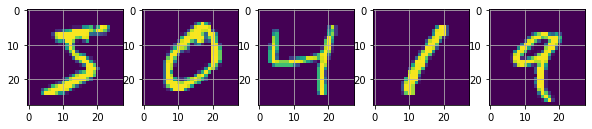

In [54]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,5, figsize=(10, 10))
for i in range(0,5):
    train_img = x_train[i,:,:]
    axs[i].imshow(train_img)
    axs[i].grid(True)

plt.show()

In [ ]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("After editing the shape of x_train:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [8]:
from keras import Sequential, Input, layers
model = Sequential(
    [
        Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ], name="MNIST_CONV_NET"
)

model.summary()

Model: "MNIST_CONV_NET"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)           

In [12]:
from keras.losses import CategoricalCrossentropy
batch_size = 128
epochs = 15

model.compile(loss=CategoricalCrossentropy(), optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 19s 44ms/step - loss: 0.1216 - accuracy: 0.9626 - val_loss: 0.0565 - val_accuracy: 0.9843
Epoch 2/15
422/422 [==============================] - 17s 41ms/step - loss: 0.0846 - accuracy: 0.9736 - val_loss: 0.0525 - val_accuracy: 0.9853
Epoch 3/15
422/422 [==============================] - 18s 42ms/step - loss: 0.0721 - accuracy: 0.9780 - val_loss: 0.0433 - val_accuracy: 0.9897
Epoch 4/15
422/422 [==============================] - 17s 40ms/step - loss: 0.0621 - accuracy: 0.9811 - val_loss: 0.0407 - val_accuracy: 0.9880
Epoch 5/15
422/422 [==============================] - 18s 42ms/step - loss: 0.0564 - accuracy: 0.9823 - val_loss: 0.0396 - val_accuracy: 0.9887
Epoch 6/15
422/422 [==============================] - 17s 40ms/step - loss: 0.0503 - accuracy: 0.9846 - val_loss: 0.0371 - val_accuracy: 0.9903
Epoch 7/15
422/422 [==============================] - 17s 40ms/step - loss: 0.0487 - accuracy: 0.9844 - val_loss: 0.0357 - val_accuracy:

In [33]:
print(history.history.keys())
loss = history.history["loss"]
accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


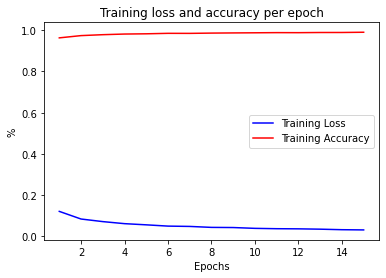

In [41]:
import matplotlib.pyplot as plt
epochs = 15
epochs_range = range(1, (epochs+1))
plt.plot(epochs_range, loss, "b", label="Training Loss")
plt.plot(epochs_range, accuracy, "r", label="Training Accuracy")
plt.title("Training loss and accuracy per epoch")
plt.xlabel("Epochs")
plt.ylabel("%")
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])